# 数据载入和总览

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import Series,DataFrame

# 1.1数据载入

In [3]:
%%time
contb1 = pd.read_csv('./usa_elect的副本/contb_01.csv')
contb2 = pd.read_csv('./usa_elect的副本/contb_02.csv')
contb3 = pd.read_csv('./usa_elect的副本/contb_03.csv')

CPU times: user 1.19 s, sys: 165 ms, total: 1.35 s
Wall time: 1.38 s


# 1.2 数据合并

In [4]:
contb1.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [5]:
contb = pd.concat([contb1,contb2,contb3],axis=0)

# 1.3 数据预览和基本统计分析

In [6]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [7]:
contb.shape

(1001733, 7)

In [8]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [9]:
contb.describe() #只能对数值型数据进行描述

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


# 2 数据清洗

# 2.1缺失值处理

In [10]:
cond = contb.contbr_employer.isnull() #找到有缺失的行
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.0,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.0,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.0,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.0,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.0,20-JAN-12
...,...,...,...,...,...,...,...
1715,"Perry, Rick",TEXAS ENERGY L.L.C.,WY,NaN,NaN,250.0,30-SEP-11
1717,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,12-NOV-11
1720,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,01-OCT-11
1722,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,29-OCT-11


In [11]:
# 没有提供
contb.contbr_employer.fillna(value='NOT PROVIDED',inplace = True)

In [12]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [13]:
contb.contbr_occupation.fillna(value='NOT PROVIDED',inplace = True)
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [14]:
cond = contb.contbr_st.isnull()
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
453997,"Obama, Barack","NEWBURG, ANDRE",NaN,NOT EMPLOYED,RETIRED,1000.0,01-DEC-11
453998,"Obama, Barack","HARBARD, SONJA",NaN,SELF-EMPLOYED,WRITER,250.0,31-MAR-12
453999,"Obama, Barack","LAKIN-THOMAS, PATRICIA",NaN,YORK UNIVERSITY,UNIVERSITY PROFESSOR,300.0,31-MAR-12
454000,"Obama, Barack","MICHAEALS, MARNIN",NaN,BAKER & MCKENZIE ZURICH,ATTORNEY,250.0,31-MAR-12


In [15]:
contb.contbr_st.fillna(value = 'NOT PROVIDED',inplace = True)

In [16]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001733 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


# 2.2数据转换

利用字典映射进行转换，党派分析

In [17]:
can = contb.cand_nm
can.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [18]:
# 通过搜索引擎等途径，获取每个总统候选人的所属党派，建立字典parties
parties = {'Bachmann, Michelle':'Republican',
           'Romney, Mitt':'Republican', 
           'Obama, Barack':'Democrat',
           "Roemer, Charles E. 'Buddy' III":'Republican', 
           'Pawlenty, Timothy':'Republican',
           'Johnson, Gary Earl':'Republican', 
           'Paul, Ron':'Republican', 
           'Santorum, Rick':'Republican',
           'Cain, Herman':'Republican', 
           'Gingrich, Newt':'Republican', 
           'McCotter, Thaddeus G':'Republican',
           'Huntsman, Jon':'Republican', 
           'Perry, Rick':'Republican'}

In [19]:
%%time
# map中可以传递一个字典，100万数据，增加一列耗时大概是125ms
contb['party'] = contb['cand_nm'].map(parties)

CPU times: user 101 ms, sys: 3.19 ms, total: 104 ms
Wall time: 115 ms


In [20]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [21]:
contb.party.value_counts() #获取每个党派的受捐额度

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [22]:
contb.columns #获取所有列属性

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [78]:
contb.groupby('party').contb_receipt_amt.sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

In [23]:
# 计算共和党、民主党收到的政治献金总额
contb.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

In [24]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 8 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001733 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
party                1001733 non-null object
dtypes: float64(1), object(7)
memory usage: 68.8+ MB


In [79]:
contb.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending = False)

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
                                             ...     
PRES OF GAS & ELECTRIC                       -2500.00
AVIATION ATTORNEY                            -2500.00
DREDGING                                     -2500.00
METAL SMITH                                  -4225.00
VENTURE PHILANTHROPIST                       -5000.00
Name: contb_receipt_amt, Length: 45074, dtype: float64

In [25]:
# 排序，按照职业汇总对赞助总金额进行排序
grouped_occupation = contb.groupby('contbr_occupation')['contb_receipt_amt'].sum()

In [26]:
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [27]:
employer = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
            'SELF':'SELF-EMPLOYED',
            'SELF EMPLOYED':'SELF-EMPLOYED'}

In [28]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 8 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001733 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
party                1001733 non-null object
dtypes: float64(1), object(7)
memory usage: 68.8+ MB


In [29]:
# 排序，按照公司汇总对赞助总金额进行排序
grouped_employer = contb.groupby('contbr_employer')['contb_receipt_amt'].sum()

In [30]:
grouped_employer.sort_values(ascending=False)[:50]

contbr_employer
RETIRED                                   41374333.67
SELF-EMPLOYED                             28745318.28
INFORMATION REQUESTED PER BEST EFFORTS    16629440.70
HOMEMAKER                                 14738524.86
INFORMATION REQUESTED                      8997347.66
NOT EMPLOYED                               8636809.43
NOT PROVIDED                               5655709.40
SELF                                       5243486.83
NONE                                       3809582.99
SELF EMPLOYED                              3495090.11
STUDENT                                     957971.85
REQUESTED                                   894009.54
MORGAN STANLEY                              386129.40
UNEMPLOYED                                  377088.31
INFORMATION REQUESTED (BEST EFFORTS)        340503.63
CREDIT SUISSE                               300740.90
VOLUNTEER                                   294118.02
MICROSOFT                                   286304.32
GOLDMAN SACH

In [31]:
f = lambda x:employer.get(x,x) #如果有x这个key,就返回x对应的值，如果没有，就返回它自己
contb['contbr_employer'] = contb['contbr_employer'].map(f)

In [32]:
grouped_employer = contb.groupby('contbr_employer')['contb_receipt_amt'].sum()
grouped_employer.sort_values(ascending=False)[:50]

contbr_employer
RETIRED                                 41374333.67
SELF-EMPLOYED                           37483895.22
NOT PROVIDED                            31282497.76
HOMEMAKER                               14738524.86
NOT EMPLOYED                             8636809.43
NONE                                     3809582.99
STUDENT                                   957971.85
REQUESTED                                 894009.54
MORGAN STANLEY                            386129.40
UNEMPLOYED                                377088.31
INFORMATION REQUESTED (BEST EFFORTS)      340503.63
CREDIT SUISSE                             300740.90
VOLUNTEER                                 294118.02
MICROSOFT                                 286304.32
GOLDMAN SACH & CO.                        233250.00
US ARMY                                   230796.52
GOLDMAN SACHS                             205338.57
BANK OF AMERICA                           197408.93
IBM                                       197129

# 2.3数据筛选

In [33]:
# 捐赠金额大于0
contb_ = contb[contb['contb_receipt_amt']>0]
contb_.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [34]:
# 查看各候选人获得的赞助金额
contb_.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False)

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [35]:
# 绘图
cand_nm_amt = contb_.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False)

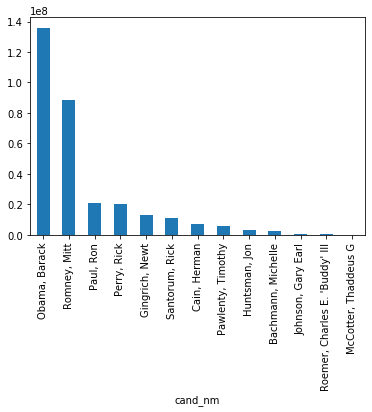

In [36]:
cand_nm_amt.plot(kind = 'bar')

In [37]:
contb_.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [38]:
# 选取候选人为Obama,Romney的子集
# 方式一
cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'

In [39]:
cond = cond1|cond2
# cond.sum
contb_vs = contb_[cond]
contb_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [40]:
# 方式二
contb_vs2 = contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")
contb_vs2

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [41]:
# 方式三
cond = contb_['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])
contb_vs3 = contb_[cond]
contb_vs3

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


# 2.4面元化数据

In [42]:
contb_['contb_receipt_amt'].max()

2014490.51

In [43]:
bins = [0,1,10,100,1000,10000,100000,10000000]
labels = pd.cut(contb_['contb_receipt_amt'],bins)
labels

0         (100, 1000]
1           (10, 100]
2         (100, 1000]
3         (100, 1000]
4         (100, 1000]
            ...      
1726    (1000, 10000]
1727    (1000, 10000]
1728      (100, 1000]
1729      (100, 1000]
1730    (1000, 10000]
Name: contb_receipt_amt, Length: 991477, dtype: category
Categories (7, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 10000000]]

# 3.数据聚合与分组运算

In [44]:
 contb_.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [45]:
# 按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
ret = contb_.pivot_table('contb_receipt_amt',index = 'contbr_occupation',columns = 'party',aggfunc='sum',fill_value=0)
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0
...,...,...
ZOOKEEPER,35.0,0.0
ZOOLOGIST,400.0,0.0
ZOOLOGY EDUCATION,25.0,0.0


In [46]:
ret.shape

(45068, 2)

In [47]:
ret['total'] = ret['Democrat'] + ret['Republican']
ret.head()

party,Democrat,Republican,total
contbr_occupation,,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0,100.0
AREA VICE PRESIDENT,250.0,0.0,250.0
RESEARCH ASSOCIATE,100.0,0.0,100.0
TEACHER,500.0,0.0,500.0
THERAPIST,3900.0,0.0,3900.0


In [48]:
ret.sort_values(by = 'total',ascending=False)

party,Democrat,Republican,total
contbr_occupation,,,
RETIRED,25305316.38,2.356124e+07,4.886656e+07
ATTORNEY,11141982.97,7.477194e+06,1.861918e+07
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
INFORMATION REQUESTED PER BEST EFFORTS,0.00,1.634053e+07,1.634053e+07
NOT PROVIDED,8858213.36,7.344655e+05,9.592679e+06
...,...,...,...
POLICY/ LAWYER,3.00,0.000000e+00,3.000000e+00
AFFORDABLE REAL ESTATE DEVELOPER,0.00,3.000000e+00,3.000000e+00
ADMINISTRATION/INSTRUCTOR,3.00,0.000000e+00,3.000000e+00


In [49]:
# 过滤掉赞助金额小于200W的数据
cond = ret['total'] < 2000000
index = ret[cond].index
ret_big = ret.drop(labels=index)
ret_big

party,Democrat,Republican,total
contbr_occupation,,,
ATTORNEY,11141982.97,7.477194e+06,1.861918e+07
C.E.O.,1690.00,2.592983e+06,2.594673e+06
CEO,2073284.79,1.618057e+06,3.691342e+06
CONSULTANT,2459912.71,2.544725e+06,5.004638e+06
ENGINEER,951525.55,1.818374e+06,2.769899e+06
EXECUTIVE,1355161.05,4.138850e+06,5.494011e+06
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
INFORMATION REQUESTED,4866973.96,3.896616e+06,8.763590e+06
INFORMATION REQUESTED PER BEST EFFORTS,0.00,1.634053e+07,1.634053e+07


In [50]:
ret_big.shape

(20, 3)

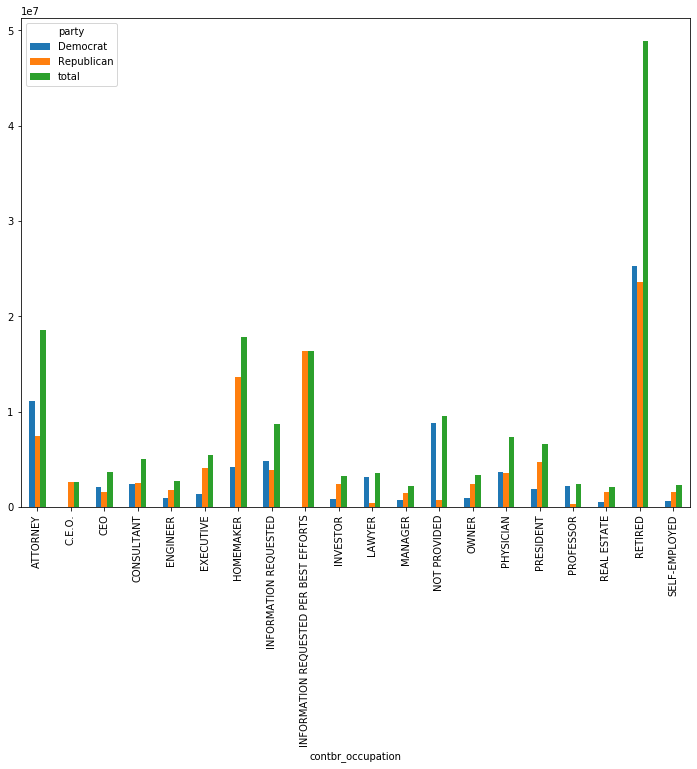

In [51]:
plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
ret_big.plot(kind = 'bar',ax = ax)

# 3.2分组级运算和转换

In [52]:
bins = [0,1,10,100,1000,10000,100000,10000000]
labels = pd.cut(contb_vs['contb_receipt_amt'],bins)

In [53]:
grouped = contb_.groupby('cand_nm')
grouped

In [54]:
for i in grouped:
    print(i)

('Bachmann, Michelle',                    cand_nm           contbr_nm contbr_st contbr_employer  \
0       Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
1       Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
2       Bachmann, Michelle       SMITH, LANIER        AL    NOT PROVIDED   
3       Bachmann, Michelle    BLEVINS, DARONDA        AR            NONE   
4       Bachmann, Michelle  WARDENBURG, HAROLD        AR            NONE   
...                    ...                 ...       ...             ...   
483921  Bachmann, Michelle       HAYES, THOMAS        WY     IAM RETIRED   
483922  Bachmann, Michelle       HAYES, THOMAS        WY     IAM RETIRED   
483923  Bachmann, Michelle        KNOPP, JOYCE        WY        KMG TOOL   
483924  Bachmann, Michelle     SUGDEN, RICHARD        WY   SELF-EMPLOYED   
483925  Bachmann, Michelle   BURRIDGE, TIMOTHY        WY   SELF-EMPLOYED   

            contbr_occupation  contb_receipt_amt contb_receipt_d

In [55]:
def get_top_amounts(grouped,key,n):
#     !!!先分组，grouped，然后继续再分
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]
grouped = contb_.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',7)

cand_nm             contbr_occupation                     
Bachmann, Michelle  RETIRED                                   854785.17
                    INFORMATION REQUESTED                     149354.00
                    HOMEMAKER                                 105622.00
                    PHYSICIAN                                  77319.00
                    PRESIDENT                                  68831.00
                                                                ...    
Santorum, Rick      INFORMATION REQUESTED PER BEST EFFORTS    919877.80
                    INFORMATION REQUESTED (BEST EFFORTS)      328323.63
                    PHYSICIAN                                 314755.19
                    ATTORNEY                                  257554.28
                    EXECUTIVE                                 254517.55
Name: contb_receipt_amt, Length: 91, dtype: float64

In [56]:
grouped = contb_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',7).unstack(level = 0,fill_value = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
C.E.O.,0.00,1968386.11
EXECUTIVE,0.00,2300947.03
HOMEMAKER,4248875.80,8147446.22
INFORMATION REQUESTED,4866973.96,0.00
INFORMATION REQUESTED PER BEST EFFORTS,0.00,11396894.84
LAWYER,3160478.87,0.00
NOT PROVIDED,8858213.36,0.00
PHYSICIAN,3735124.94,0.00


In [57]:
contb_vs.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [58]:
grouped.apply(get_top_amounts,'contbr_employer',7).unstack(level = 0,fill_value = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_employer,,
CREDIT SUISSE,0.00,281150.00
HOMEMAKER,2605408.54,8147196.22
MORGAN STANLEY,0.00,267266.00
NOT EMPLOYED,8586308.70,0.00
NOT PROVIDED,13883494.03,12321731.24
RETIRED,22694558.85,11506225.71
SELF-EMPLOYED,18626807.16,7414115.22
STUDENT,318831.45,496490.94
VOLUNTEER,257104.00,0.00


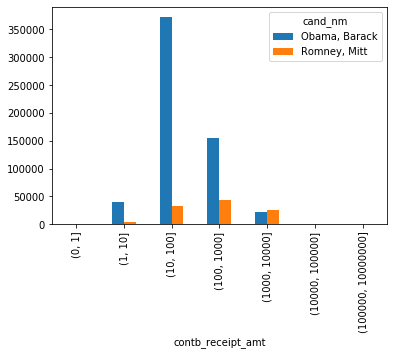

In [59]:
amt_vs = contb_vs.groupby(['cand_nm',labels]).size().unstack(level = 0,fill_value = 0)
amt_vs.plot(kind = 'bar')

In [60]:
cond = contb_vs.contb_receipt_amt > 100000
contb_vs[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
257270,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,DC,NOT PROVIDED,NOT PROVIDED,451726.00,30-JUN-11,Democrat
319478,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,526246.17,30-APR-12,Democrat
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,2014490.51,29-FEB-12,Democrat
326651,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,1944042.43,31-DEC-11,Democrat
335187,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,512710.91,31-JAN-12,Democrat
344419,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,1511192.17,30-SEP-11,Democrat
344539,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDED,NOT PROVIDED,1679114.65,31-MAR-12,Democrat


In [61]:
amt_vs

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 10000000]",7,0


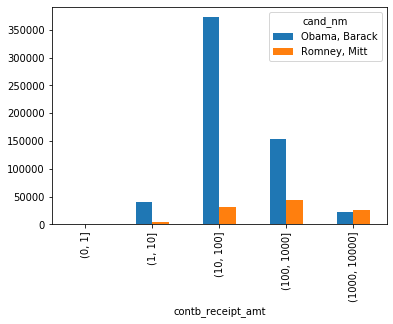

In [62]:
amt_vs[:-2].plot(kind = 'bar')

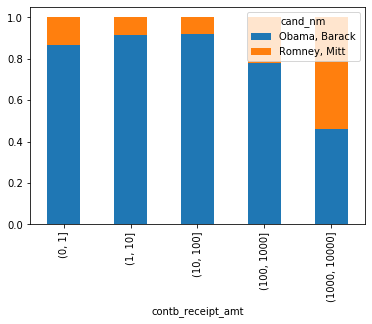

In [63]:
#百分比堆积图
amt_vs.div(amt_vs.sum(axis = 1),axis = 0)[:-2].plot(kind = 'bar',stacked = True)

# 4.时间处理

In [64]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [65]:
contb_vs.dtypes

cand_nm               object
contbr_nm             object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
party                 object
dtype: object

In [66]:
contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
contb_vs.dtypes

cand_nm                      object
contbr_nm                    object
contbr_st                    object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
party                        object
dtype: object

In [68]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02-01,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02-01,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,2012-04-13,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,2011-08-21,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,2012-03-07,Republican


# 4.2以时间作为索引

In [69]:
contb_vs_time = contb_vs.set_index('contb_receipt_dt')
contb_vs_time

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
contb_receipt_dt,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican
...,...,...,...,...,...,...,...
2012-02-26,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,Democrat
2012-01-20,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,Democrat
2012-01-20,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,Democrat


# 4.3重采样和频度转换

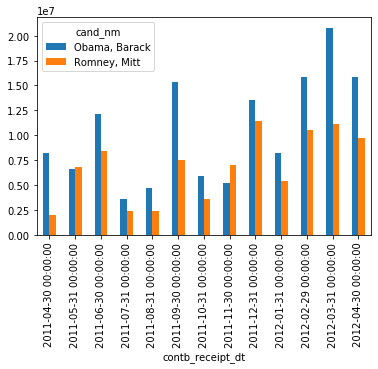

In [70]:
contb_time = contb_vs_time.groupby('cand_nm').resample('M')['contb_receipt_amt'].sum().unstack(level = 0)
contb_time.plot(kind = 'bar')

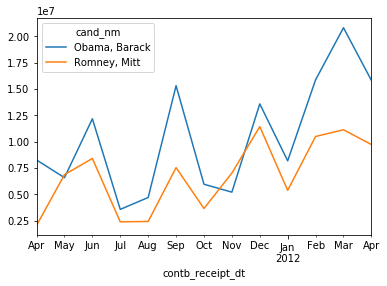

In [71]:
contb_time.plot(kind = 'line') 

# 5.各州支持率

In [72]:
state_vs = contb_vs.groupby(['cand_nm','contbr_st'])['contb_receipt_amt'].sum().unstack(level = 0)
state_vs.fillna(0,inplace = True)

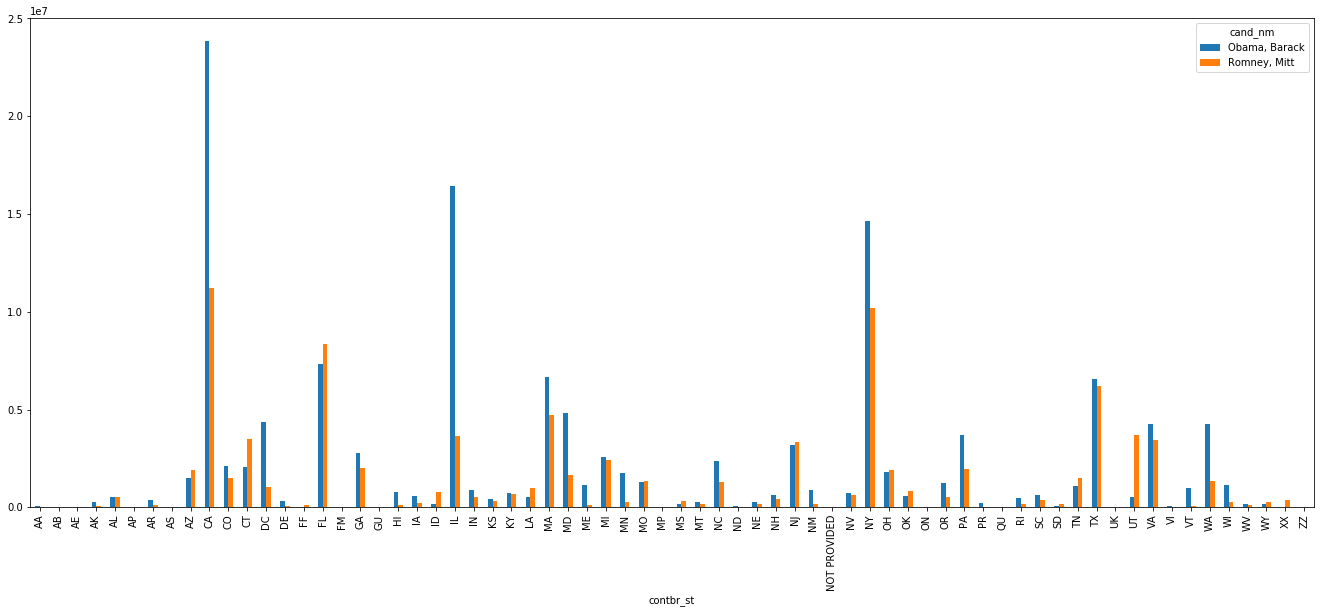

In [73]:
plt.figure(figsize = (23,9))
ax = plt.subplot(1,1,1)
state_vs.plot(kind = 'bar',ax = ax)

In [74]:
state_vs_rate = state_vs.div(state_vs.sum(axis = 1),axis = 0)
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AB,1.000000,0.000000
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [75]:
state_vs_rate.drop(labels = ['AA','AB','AE','NOT PROVIDED'],inplace=True)
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,0.000000
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [76]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'